---
# Examine effect of gender on Shark Tank deals
---

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
plt.style.use('seaborn')
FS = 16
from genderize import Genderize

## Load the Shark Tank data

In [622]:
# df = pd.read_csv('./data/SharkTankDeals.csv').dropna(subset=['Valuation'])
# https://www.quora.com/What-have-you-learned-from-watching-the-television-program-Shark-Tank/answer/Halle-Tecco
df = pd.read_csv('./data/SharkTankDeals.csv').dropna(subset=['Entrepreneur Gender'])
df.rename(columns = {'Entrepreneur Gender':'gender'}, inplace = True)
df = df[df.gender != 'Mixed Team']

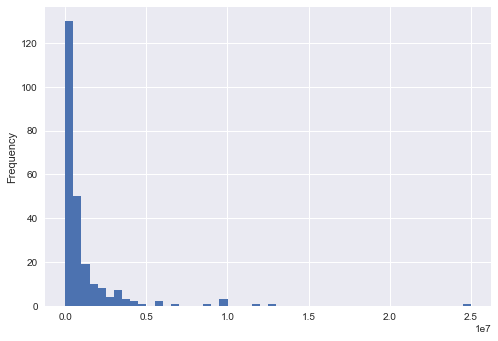

In [167]:
df['Valuation'] = [int(value.split('$',1)[-1].replace(',','')) for value in df.Valuation.values]
df.Valuation.plot.hist(50)

In [5]:
df = pd.read_csv('./data/Shark Tank Companies.csv').dropna(subset=['entrepreneurs'])
df.valuation = df.valuation/1e6

In [9]:
names = [name.split(',')[0].split(' ')[0] for name in df.entrepreneurs]

## Determine gender of entrepreneur based on first name

In [ ]:
# genders = [(item['name'], item['gender']) for item in Genderize().get(names) if item['probability']>0.8]
genders = [(item['name'], item['gender']) for item in Genderize().get(names)]
genders[:10]

In [11]:
# Add the genders to the dataframe
df['gender'] = [g[1] for g in genders]

In [184]:
print('Total male   entrepreneurs: {}'.format((df.gender=='Male').sum()))
print('Total female entrepreneurs: {}'.format((df.gender=='Female').sum()))

Total male   entrepreneurs: 295
Total female entrepreneurs: 125


### Relationship between gender and deal details

AttributeError: 'DataFrame' object has no attribute 'valuation'

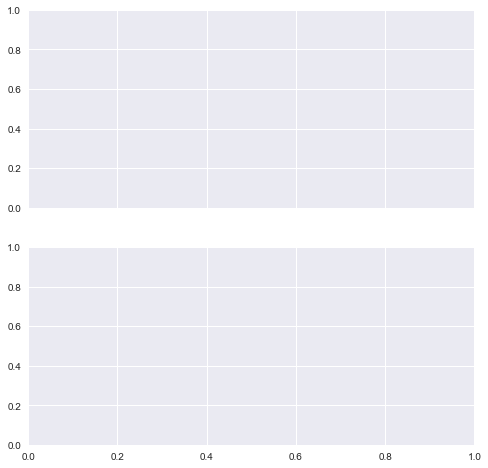

In [186]:
gender_labels = [('Male','b'), ('Female','r')]
fig, axs = plt.subplots(nrows=2, figsize=(8,8), sharex=True)
for ax,g in zip(axs,gender_labels):
    df.valuation[df.gender==g[0]].plot.hist(50, ax=ax, density=True, alpha=1, color=g[1])
    [ax.spines[s].set_visible(False) for s in ['right','top','left']]
#     ax.set_title(g[0] + ' entrepreneurs', fontsize=FS)    
    ax.set_xlabel('Evaluation (millions of $)', fontsize=FS-2)
    ax.set_ylabel('')    
    ax.set_yticklabels('')
    ax.set_yticks([])
    ax.set_xlim([0,10])
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(FS)
    midx = np.mean(ax.get_xlim())
    topy = 0.9*np.max(ax.get_ylim())    
    ax.text(midx,topy,g[0] + ' entrepreneurs', fontsize=FS, horizontalalignment='center')

In [617]:
np.unique(df.gender)

array(['Female', 'Male', 'Mixed Team'], dtype=object)

In [188]:
for gender in ['male','female']:
    percent_funded = ((df.gender==gender).values * df.deal.values).sum()/(df.gender==gender).sum()
    valuation = df.valuation[df.gender==gender].median()
    print('-'*30)
    print('Total {} entrepreneurs: {}'.format(gender, (df.gender==gender).sum()))
    print("{:.1f} % of {}s were funded.".format(100*percent_funded, gender))
    print("Median valuation of {} companies: ${:.2f} million".format(gender, valuation))
    print('\n')

AttributeError: 'DataFrame' object has no attribute 'deal'

In [624]:
sharks = ['Corcoran', 'Greiner', 'Cuban', 'Herjavec', 'John', "O'Leary"]
for shark in sharks:
    df[shark].fillna(0, inplace=True)

In [625]:
for shark in sharks:
    print('-'*30 + shark + '-'*30)        
    for gender in ['Male','Female']:
        num_gender = (df.gender==gender).sum()
        percent_funded = 100*df[shark][df.gender==gender].sum()/num_gender
        print("of the {num:.0f} {gender} entrepreneurs {shark} met, they funded {per:.1f}%.".format(
                num=num_gender, gender=gender, shark=shark, per=percent_funded))

------------------------------Corcoran------------------------------
of the 295 Male entrepreneurs Corcoran met, they funded 6.4%.
of the 125 Female entrepreneurs Corcoran met, they funded 19.2%.
------------------------------Greiner------------------------------
of the 295 Male entrepreneurs Greiner met, they funded 9.2%.
of the 125 Female entrepreneurs Greiner met, they funded 12.0%.
------------------------------Cuban------------------------------
of the 295 Male entrepreneurs Cuban met, they funded 14.6%.
of the 125 Female entrepreneurs Cuban met, they funded 16.0%.
------------------------------Herjavec------------------------------
of the 295 Male entrepreneurs Herjavec met, they funded 13.2%.
of the 125 Female entrepreneurs Herjavec met, they funded 5.6%.
------------------------------John------------------------------
of the 295 Male entrepreneurs John met, they funded 11.5%.
of the 125 Female entrepreneurs John met, they funded 12.0%.
------------------------------O'Leary-----

Text(0.5,0.93,'Breakdown of deals on Shark Tank by gender')

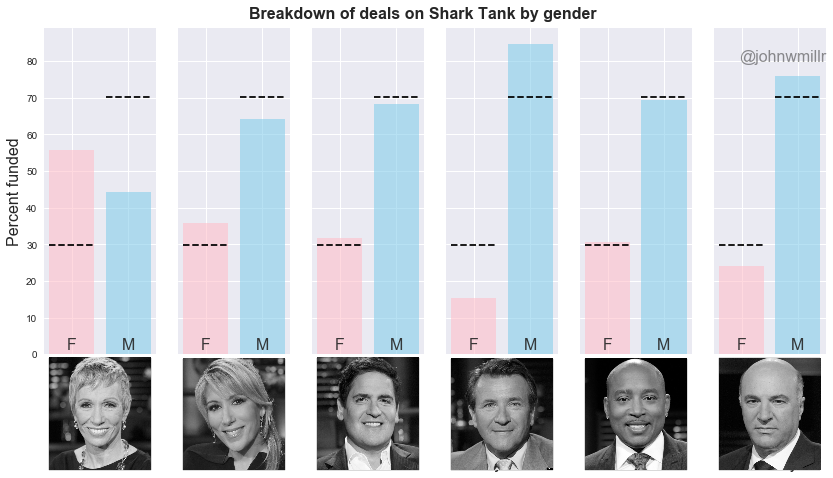

In [626]:
# Ratios of men and women appearing on show
gender_ratios = {'m': 100*(df.gender=='Male').sum()/df.shape[0], 'f': 100*(df.gender=='Female').sum()/df.shape[0]}

# gender_labels = ['Male','Female']
gender_labels = np.unique(df.gender)[:2]
fig, axs = plt.subplots(ncols=len(sharks), sharey=True, figsize=(14,6))
idxs = np.linspace(0,1,num=9)
for ax,shark,idx in zip(axs,sharks,idxs):
    percent_funded = []
    for n,gender in enumerate(gender_labels):
        num_gender = (df.gender==gender).sum()
        percent_funded.append(
#             100*((df.gender==gender).values * df[shark].values).sum()/df[shark].sum()-gender_ratios[gender[0].lower()])
            100*((df.gender==gender) * df[shark]).sum()/df[shark].sum())        
        
    # Plot the reference line
    ax.plot([ 0.6, 1.4], gender_ratios['m']*np.array([1, 1]), color='k', linestyle='--')
    ax.plot([-0.4, 0.4], gender_ratios['f']*np.array([1, 1]), color='k', linestyle='--')
        
    # Bar plot
    ax.bar([0,1], percent_funded, color=['pink','skyblue'], alpha=0.6)
    if ax==axs[0]:
        ax.set_ylabel('Percent funded', fontsize=FS)
    ax.set_xticklabels([])
    ax.text(0,1.4,'F', horizontalalignment='center', fontsize=FS, alpha=0.9)
    ax.text(1,1.4,'M', horizontalalignment='center', fontsize=FS, alpha=0.9)
    
    if ax == axs[-1]:
        ax.text(1.5, 80, "@johnwmillr", fontsize=FS, alpha=0.5, horizontalalignment='right')
        ax.text(0.5, -30, " ", fontsize=FS-2, alpha=0.5, horizontalalignment='center')
        
    im = plt.imread('./figures/sharks/{}.png'.format(shark.lower()))
    xy = [0, 0]

    imagebox = OffsetImage(im, zoom=0.2)
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(28,-60),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0)
    ax.add_artist(ab)        
    ax.text(0.5, -31, shark, fontsize=FS, horizontalalignment='center')
    
plt.suptitle('Breakdown of deals on Shark Tank by gender', y=0.93, fontsize=FS, fontweight='heavy')

# fig.savefig('./figures/percent_funded.png', dpi=300)

In [627]:
men_to_women = (df.gender=='Male').sum()/(df.gender=='Female').sum()
men_to_women

2.36

In [628]:
shark = 'Herjavec'
df[shark][df.gender=='Male'].sum()/df[shark][df.gender=='Female'].sum()

2.15

In [633]:
sharks

['Corcoran', 'Greiner', 'Cuban', 'Herjavec', 'John', "O'Leary"]

In [634]:
shark = 'Corcoran'
100*df[shark][df.gender=='Female'].sum()/df[shark].sum() - gender_ratios['f']

26.05204872646733

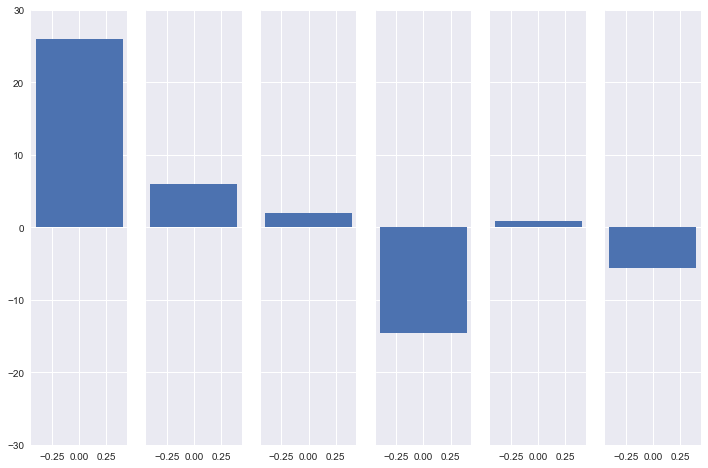

In [638]:
fig, axs = plt.subplots(ncols=len(sharks), figsize=(12,8), sharey=True)
for ax,shark in zip(axs,sharks):
    metric = 100*df[shark][df.gender=='Female'].sum()/df[shark].sum() - gender_ratios['f']
    ax.bar(0,metric)
    ax.set_ylim([-30, 30])

In [608]:
gender_funded = {'f': df.Cuban[df.gender=='Female'].sum(), 'm': df.Cuban[df.gender=='Male'].sum()}
gender_funded['t'] = gender_funded['f']+gender_funded['m']
gender_funded

{'f': 20.0, 'm': 43.0, 't': 63.0}

Text(0.5,0.93,'Breakdown of deals on Shark Tank by gender')

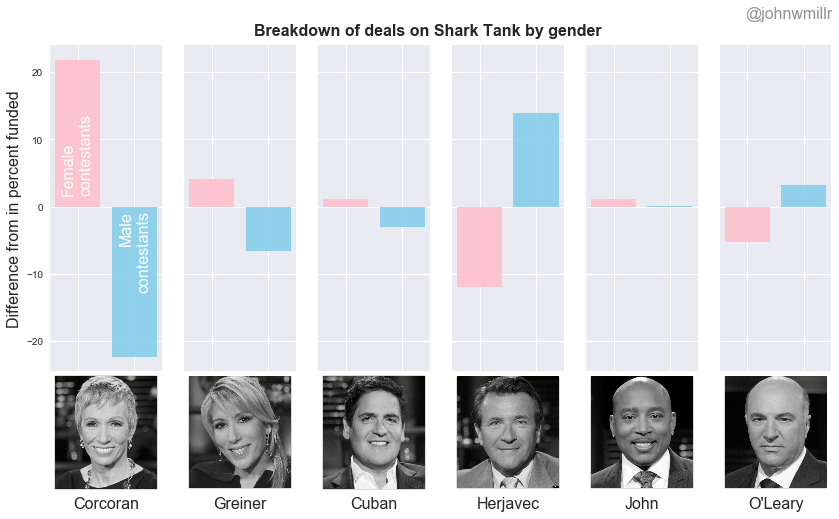

In [612]:
# Ratios of men and women appearing on show
gender_ratios = {'m': 100*(df.gender=='Male').sum()/df.shape[0], 'f': 100*(df.gender=='Female').sum()/df.shape[0]}

# gender_labels = ['Male','Female']
gender_labels = np.unique(df.gender)[:2]
fig, axs = plt.subplots(ncols=len(sharks), sharey=True, figsize=(14,6))
idxs = np.linspace(0,1,num=9)
for ax,shark,idx in zip(axs,sharks,idxs):
    percent_funded = []
    for n,gender in enumerate(gender_labels):
        num_gender = (df.gender==gender).sum()
        percent_funded.append(
            100*((df.gender==gender) * df[shark]).sum()/df[shark].sum()-gender_ratios[gender[0].lower()])
        
    # Bar plot
    ax.bar([0,1], percent_funded, color=['pink','skyblue'], alpha=0.9)
    if ax==axs[0]:
        ax.set_ylabel('Difference from in percent funded', fontsize=FS)
    ax.set_xticklabels([])
    
    if ax == axs[0]:
        ax.text(-0.3,9.5, 'Female\ncontestants', ha='left', fontsize=FS, alpha=1, rotation=90, color='w')
        ax.text(1.3,-5,'Male\ncontestants', ha='right', fontsize=FS, alpha=1, rotation=90, color='w')
    
    if ax == axs[-1]:
        ax.text(1.5, 28, "@johnwmillr", fontsize=FS, alpha=0.5, horizontalalignment='right')
        ax.text(0.5, -30, " ", fontsize=FS-2, alpha=0.5, horizontalalignment='center')
        
    im = plt.imread('./figures/sharks/{}.png'.format(shark.lower()))
    xy = [0, 0]

    imagebox = OffsetImage(im, zoom=0.2)
    imagebox.image.axes = ax

    ab = AnnotationBbox(imagebox, xy,
                        xybox=(28,-226),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0)
    ax.add_artist(ab)        
    ax.text(0.5, -45, shark, fontsize=FS, horizontalalignment='center')
    
plt.suptitle('Breakdown of deals on Shark Tank by gender', y=0.93, fontsize=FS, fontweight='heavy')

# fig.savefig('./figures/percent_funded.png', dpi=300)

In [457]:
np.mean(ax.get_xlim())

0.5

In [447]:
im.shape[0]*0.18

100.61999999999999

In [438]:
ax.get_xticks()

array([-1.,  0.,  1.,  2.])

In [362]:
help(fig.figimage)

Help on method figimage in module matplotlib.figure:

figimage(X, xo=0, yo=0, alpha=None, norm=None, cmap=None, vmin=None, vmax=None, origin=None, resize=False, **kwargs) method of matplotlib.figure.Figure instance
    Adds a non-resampled image to the figure.
    
    call signatures::
    
      figimage(X, **kwargs)
    
    adds a non-resampled array *X* to the figure.
    
    ::
    
      figimage(X, xo, yo)
    
    with pixel offsets *xo*, *yo*,
    
    *X* must be a float array:
    
    * If *X* is MxN, assume luminance (grayscale)
    * If *X* is MxNx3, assume RGB
    * If *X* is MxNx4, assume RGBA
    
    Optional keyword arguments:
    
      =========   =========================================================
      Keyword     Description
      =========   =========================================================
      resize      a boolean, True or False. If "True", then re-size the
                  Figure to match the given image size.
      xo or yo    An integer,

In [361]:
help(fig.add_axes)

Help on method add_axes in module matplotlib.figure:

add_axes(*args, **kwargs) method of matplotlib.figure.Figure instance
    Add an axes at position *rect* [*left*, *bottom*, *width*,
    *height*] where all quantities are in fractions of figure
    width and height.
    
    Parameters
    ----------
    rect : sequence of float
        A 4-length sequence of [left, bottom, width, height] quantities.
    
    projection :
        ['aitoff' | 'hammer' | 'lambert' | 'mollweide' | 'polar' | 'rectilinear'], optional
        The projection type of the axes.
    
    polar : boolean, optional
        If True, equivalent to projection='polar'.
    
    **kwargs
        This method also takes the keyword arguments for
        :class:`~matplotlib.axes.Axes`.
    
    Returns
    -------
    axes : Axes
        The added axes.
    
    Examples
    --------
    A simple example::
    
        rect = l,b,w,h
        fig.add_axes(rect)
        fig.add_axes(rect, frameon=False, facecolor='g')
 

In [357]:
np.mean(ax.get_xlim())

0.5

In [310]:
import PIL

In [312]:
from PIL import Image

In [317]:
im = Image.open('./figures/sharks/cuban.png')
height = im.size[1]

# We need a float array between 0-1, rather than
# a uint8 array between 0-255
im = np.array(im).astype(np.float) / 255

fig = plt.figure()

# plt.plot(np.arange(4), 4 * np.arange(4))

# With newer (1.0) versions of matplotlib, you can 
# use the "zorder" kwarg to make the image overlay
# the plot, rather than hide behind it... (e.g. zorder=10)
fig.figimage(im)
plt.show()

<Figure size 576x396 with 0 Axes>

In [ ]:
im = plt.imread('./figures/sharks/cuban.png')

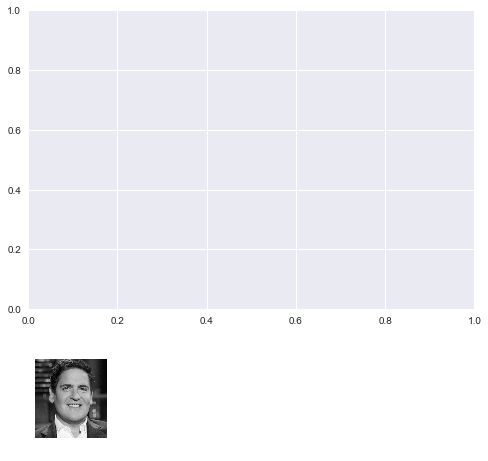

In [339]:
fig, ax = plt.subplots()
newax = fig.add_axes([0.1, -0.2, 0.2, 0.2])
newax.imshow(im)
newax.axis('off')

plt.show()

In [287]:
for shark in sharks:
    print('-'*30 + shark + '-'*30)        
    for gender in ['Male','Female']:
        percent_funded = ((df.gender==gender).values * df[shark].values).sum()/df[shark].sum()
        print("Of the {num:.0f} entrepreneurs {shark} funded, {per:.1f} % were {gender}.".format(
            num=df[shark].sum(), shark=shark, per=100*percent_funded, gender=gender))

------------------------------Corcoran------------------------------
Of the 51 entrepreneurs Corcoran funded, 37.3 % were Male.
Of the 51 entrepreneurs Corcoran funded, 47.1 % were Female.
------------------------------Greiner------------------------------
Of the 51 entrepreneurs Greiner funded, 52.9 % were Male.
Of the 51 entrepreneurs Greiner funded, 29.4 % were Female.
------------------------------Cuban------------------------------
Of the 76 entrepreneurs Cuban funded, 56.6 % were Male.
Of the 76 entrepreneurs Cuban funded, 26.3 % were Female.
------------------------------Herjavec------------------------------
Of the 53 entrepreneurs Herjavec funded, 73.6 % were Male.
Of the 53 entrepreneurs Herjavec funded, 13.2 % were Female.
------------------------------John------------------------------
Of the 57 entrepreneurs John funded, 59.6 % were Male.
Of the 57 entrepreneurs John funded, 26.3 % were Female.
------------------------------O'Leary------------------------------
Of the 35 e

### Effect of requested valuation on success of deal

In [125]:
for deal in [True, False]:
    valuation = df.valuation[df.deal==deal].median()
    print('The median valuation where deal is {} is ${:.2f} million'.format(deal, valuation))

The median valuation where deal is True is $0.90 million
The median valuation where deal is False is $0.83 million
